<a href="https://colab.research.google.com/github/menezeslarissa/nature-inspired-algorithms/blob/main/Particle_Swarm_Optimization_(PSO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilize o PSO para minimizar a seguinte função no intervalo:
\begin{align}
        \left. \bigg [
        \begin{array}{cl}
        -5 & +5 \\
        -5 & +5
        \end{array}
        \right.
    \end{align}

<br>

\begin{align}
        \left. f(x,y) = (1 - x)^2 + 100(y - x^2)^2 \right.
    \end{align}
<br>
Inclua em seu relatório um gráfico que mostre o valor mínimo e médio de f(x, y) ao longo das iterações, além das
configurações utilizadas e outros resultados que julgar interessantes.
Compare os resultados obtidos com aqueles obtidos com algoritmos genéticos no mesmo problema.

In [ ]:
# Importação de bibliotecas

import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib.animation as animation
import time
import os
# %matplotlib inline

output_folder = "/content/drive/MyDrive/"


In [ ]:
# Parâmetros globais
num_particulas = 2
x_min = -5
x_max = 5
v_max = 2 # Limite máximo para velocidade
v_min = -2 # Limite mínimo para a velocidade
iteracoes=300

def funcao_objetivo(x, y):
  return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def atualizar_velocidade(particula, velocidade, melhor_posicao, melhor_global, c1, c2, w):
  nova_velocidade = np.array([0.0 for i in range(num_particulas)]) # Cria um array de zeros com a velocidade de cada partícula

  # Gera dois números aleatórios entre 0 e 1
  r1 = np.random.uniform(0,1)
  r2 = np.random.uniform(0,1)

  # Para cada partícula
  for i in range(len(particula)):
    # Primeiro termo: constante de inércia multiplicado pela velocidade da partícula
    # Segundo termo: constante cognitiva multiplicada por um número aleatório e pela diferença entre a melhor posição encontrada até o momento e a posição atual
    # Terceito termo: constante social multiplicada por um númerio aleatório e pela diferença entre a melhor posição global e a posição atual
    nova_velocidade[i] = w*velocidade[i] + c1*r1*(melhor_posicao[i]-particula[i])+c2*r2*(melhor_global[i]-particula[i])

  # Ajusta a nova velocidade dentro dos limites vMax e vMin, caso necessário
  nova_velocidade = ajustar_limites(nova_velocidade, v_min, v_max)
  # Retorna a velocidade atualizada
  return nova_velocidade

def atualizar_velocidade_c(particula, velocidade, melhor_posicao, melhor_global, c1, c2, constriction):
  nova_velocidade = np.array([0.0 for i in range(num_particulas)]) # Cria um array de zeros com a velocidade de cada partícula

  # Gera dois números aleatórios entre 0 e 1
  r1 = np.random.uniform(0,1)
  r2 = np.random.uniform(0,1)

  # Para cada partícula
  for i in range(len(particula)):
    # Primeiro termo dentro dos parenteses: velocidade da partícula
    # Segundo termo: constante cognitiva multiplicada por um número aleatório e pela diferença entre a melhor posição encontrada até o momento e a posição atual
    # Terceito termo: constante social multiplicada por um númerio aleatório e pela diferença entre a melhor posição global e a posição atual
    # Por fim, o faot de constrição é somado ao resultado da somatória dos termos
    nova_velocidade[i] = constriction*(velocidade[i] + c1*r1*(melhor_posicao[i]-particula[i])+c2*r2*(melhor_global[i]-particula[i]))

  # Ajusta a nova velocidade dentro dos limites vMax e vMin, caso necessário
  nova_velocidade = ajustar_limites(nova_velocidade, v_min, v_max)
  # Retorna a velocidade atualizada
  return nova_velocidade

def ajustar_limites(arr, lb, ub):
  arr[0] = max(min(arr[0], ub), lb)
  arr[1] = max(min(arr[1], ub), lb)
  return arr

def atualizar_posicao(particula, velocidade):
  # Movimentação das partículas
  # A nova posição é a posição atual da partícula mais a velocidade
  nova_posicao = particula + velocidade

  # Ajusta os limites de x e y caso necessário
  nova_posicao = ajustar_limites(nova_posicao, x_min, x_max)
  return nova_posicao

def init_populacao(tam_populacao, dimensao):
  # Inicializa a população de partículas, cada uma em uma posição
  populacao = [[np.random.uniform(x_min, x_max) for j in range(dimensao)] for i in range(tam_populacao)]
  return populacao

# Recebe como parâmetro o tamanho da população, a dimensão, a constante cognitiva, a constante social e a constante de inércia/constrição
def pso(tam_populacao, dimensao, c1, c2, w, use_constriction):

  # Vetor valores mínimos
  vetor_minimo = []
  # Vetor valores médios
  vetor_media = []

  # Vetor que irá armazenar as melhores posiçoes de x e y da vizinhança a cada iteração
  valores_x = []
  valores_y = []

  # Inicializa população de particulas
  particulas = init_populacao(tam_populacao, dimensao)
  # Melhor posição particula
  particula_melhor_pos = particulas
  # Fitness da população
  pop_fitness = [funcao_objetivo(p[0],p[1]) for p in particulas]
  # Melhor global (Vizinhança)
  melhor_global = particula_melhor_pos[np.argmin(pop_fitness)]
  # Inicialização da velocidade
  velocidade = np.zeros((tam_populacao, dimensao))

  # Inicio do loop das iterações
  for i in range(iteracoes):

    for j in range(len(particulas)):
      # Atualiza velocidade de cada particula de acordo com o fator escolhido (inércia ou constrição)
      if(use_constriction):
        velocidade[j] = atualizar_velocidade(particulas[j], velocidade[j], particula_melhor_pos[j], melhor_global, c1, c2, w)
      else:
        velocidade[j] = atualizar_velocidade_c(particulas[j], velocidade[j], particula_melhor_pos[j], melhor_global, c1, c2, w)

      # Movimenta particulas para a nova posição
      particulas[j] = atualizar_posicao(particulas[j], velocidade[j])


    # Calcula o fitness da população após a atualização das velocidades e posições
    pop_fitness = [funcao_objetivo(p[0],p[1]) for p in particulas]
    # Melhor global atualizado
    melhor_global = particula_melhor_pos[np.argmin(pop_fitness)]
    # Armazena as melhores posições da vizinhança da iteração atual
    valores_x.append(melhor_global[0])
    valores_y.append(melhor_global[1])

    #Armazena o melhor fitness da população atual na iteração
    vetor_minimo.append(min(pop_fitness))
    #Armazena a média dos fitness da população atual na iteração
    vetor_media.append(np.mean(pop_fitness))

  print('Melhor global: ', melhor_global)
  print('Melhor fitness da população final: ', min(pop_fitness))
  print('Média dos fitness: ', np.average(pop_fitness))
  return particulas, vetor_minimo, vetor_media, valores_x, valores_y



In [ ]:
def plotar_grafico(min, media):
  plt.figure(figsize=(9,4))
  plt.plot(range(len(min)), min, label = "Valores mínimos de f(x,y)")
  plt.plot(range(len(media)), media, label = "Valores médios de f(x,y)")
  plt.xlabel("Iterações")
  plt.ylabel("Fitness")
  plt.title('Valores de Fitness ao longo das iterações')
  plt.legend(loc='upper left', bbox_to_anchor=(0.9, 0., 0.9, 0.9))
  plt.savefig(os.path.join(output_folder, 'valores_fitness_%s.png' % time.time()), bbox_inches='tight')
  plt.show()

In [ ]:
def plot_particulas(x, y, legend, filename):
  fig, ax = plt.subplots()
  sc_x = ax.scatter([], [], c='blue', marker='o', label='Valores de x')  # Scatter para os valores de x
  sc_y = ax.scatter([], [], c='red', marker='>', label='Valores de y')  # Scatter para os valores de y
  plt.legend(legend) # Adiciona legenda

  def animate(i):
    if i < len(x):
      # Atualiza o scatter com os valroes de x
      sc_x.set_offsets([[x[i], 0]])
    if i < len(y):
      # Atualiza o scatter com os valores de y
      sc_y.set_offsets([[y[i], 0]])
    return sc_x, sc_y

  def init():
    # Propriedades do plot
    ax.set_xlim(min(x) - 0.2, max(x) + 0.2) # Seta limites de x
    ax.set_ylim(min(y) - 0.2, max(y) + 0.2)  # Seta limites de y
    ax.legend()
    return sc_x, sc_y

  ani = animation.FuncAnimation(fig, animate, frames=max(len(x), len(y)), init_func=init,
                                blit=True, repeat=False)

  ani.save(filename + '.gif', writer='pillow')  # Save the animation as a GIF

# Experimento 01

Parâmetros:
* Inércia: w = 0.5
* Constante cognitiva: c_cog = 0.1
* Constante social: c_social = 0.2
* Tamanho da população: 10

In [ ]:
start = time.time()
particulas_final, minimo, media, x, y = pso(10, 2, 0.1, 0.2, 0.5, False)
end = time.time()

print('Tempo de execução: ', end - start)



Melhor global:  [0.12325274 0.00802776]
Melhor fitness da população final:  0.7738172986586429
Média dos fitness:  0.7738172986586429
Tempo de execução:  0.06968474388122559


In [ ]:
print(minimo)
print(media)
print(x)
print(y)

[60.594378836684484, 60.594378836684484, 60.594378836684484, 60.594378836684484, 60.594378836684484, 30.808793725086797, 0.22553192268603378, 1.061385810495526, 0.8210446822588933, 0.9809993810301697, 0.8924180782145211, 0.804107374750709, 0.8665330195980877, 0.9207147201245468, 0.8580871044467206, 0.805887662265066, 0.8056079891746476, 0.7959989865356659, 0.7852986163838399, 0.780104503907737, 0.7775495533325505, 0.7762830060780664, 0.7756525156411685, 0.7753379726793072, 0.7751808775737262, 0.7751023742164129, 0.7750631335993453, 0.7750435160577996, 0.7750337079789731, 0.7746218023988006, 0.7744224315977228, 0.7741285690866716, 0.7739764205356052, 0.7739004895653163, 0.7738625598990513, 0.7738436040197096, 0.7738341283183704, 0.7738293910272691, 0.773827022521609, 0.7738258383037511, 0.7738252462035651, 0.7738249501556581, 0.7738248021322508, 0.7738247281206839, 0.7738246911149346, 0.7738227500687913, 0.7738211985690395, 0.7738204228276762, 0.7738200349591229, 0.7738194481498165, 0.7

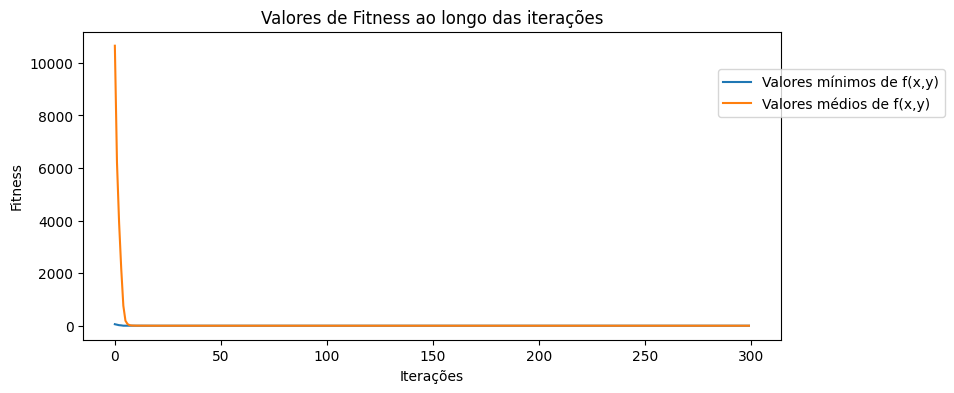

In [ ]:
plotar_grafico(minimo, media)

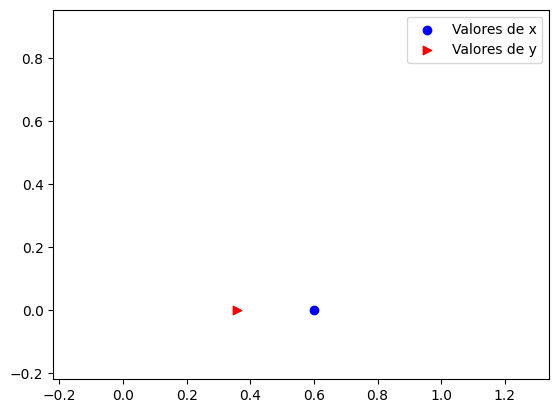

In [ ]:
# Cria o gif com nome 'particulas_exp1' na raiz do diretório do colab
plot_particulas(x, y, 'Melhores valores de x e y durante as iterações (Experimento 01)', 'particulas_exp1')

# Experimento 02

Parâmetros:
* Fator de constrição: w = 0.729
* Vmax = Xmax
* Constante cognitiva: c_cog = 2.05
* Constante social: c_social = 2.05
* Tamanho da população: 50
* Iterações: 500

In [ ]:
iteracoes=500
x_c = 0.729
v_max = 5
start2 = time.time()

particulas_final_2, minimo_2, media_2, x_2, y_2 = pso(50, 2, 2.05, 2.05, x_c, True)

end2 = time.time()

print('Tempo de execução: ', end2 - start2)

Melhor global:  [1. 1.]
Melhor fitness da população final:  0.0
Média dos fitness:  3.6186793918601157e-25
Tempo de execução:  0.9124546051025391


In [ ]:

print(minimo_2)
print(media_2)
print(x_2)
print(y_2)

[0.08945551033120944, 0.2750672345549648, 6.009793971703246, 0.13387909831220432, 0.005996043307161672, 0.08228401817345624, 0.1590502927730864, 0.1563254061613041, 0.16282505799919358, 0.052681428343359794, 0.6475493216562879, 0.08700152984266486, 0.017493771037265227, 0.0850352323102638, 0.042552878339055196, 0.057426949108279196, 0.0975744656221776, 0.017431572656435836, 0.029532537909627312, 0.003992854206396112, 0.0023632629971616272, 0.004443169885380655, 0.006283745160719691, 0.007482141130035503, 0.003389714761203019, 0.0037502438623347066, 0.009849887361568064, 0.018198450816634175, 0.005937864750346529, 0.010698227026987603, 0.010910900550094015, 0.015099385357262445, 0.016765731099687767, 0.017433083425416284, 0.024804568392117386, 0.017220483708692943, 0.012389149104694139, 0.009133053453831131, 0.003232925394108848, 4.006038625694427e-05, 0.002272394359759671, 0.0025711861645460574, 0.0002730540956993841, 0.00011748972374592502, 8.295829438270916e-05, 0.0007741691150681262

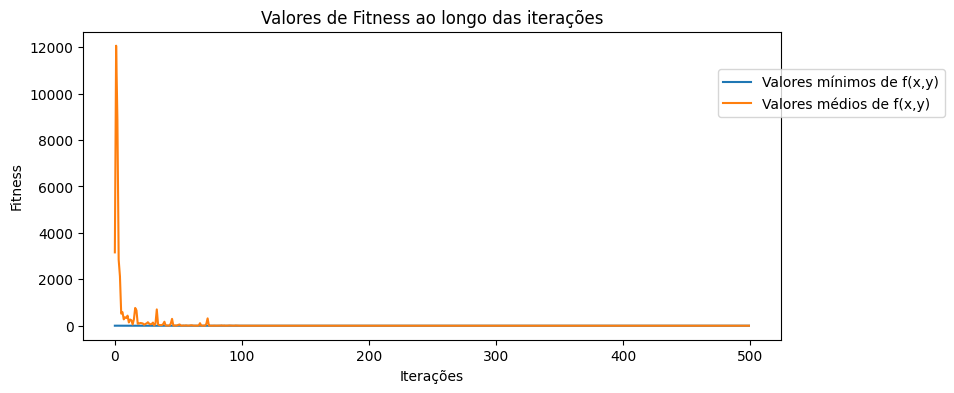

In [ ]:
plotar_grafico(minimo_2, media_2)

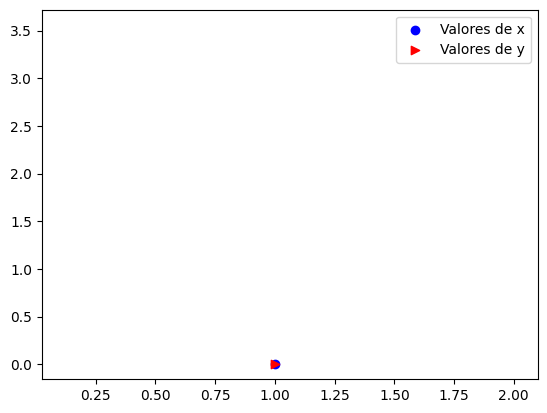

In [ ]:
# Cria o gif com nome 'particulas_exp2' na raiz do diretório do colab
plot_particulas(x_2, y_2, 'Melhores valores de x e y durante as iterações (Experimento 02)', 'particulas_exp2')